# Ex 1: Bayesian inference for Poisson model


In [51]:
x = c(3,0,1,5,2)

a) assuming a positive uniform prior distribution for the parameter mu, determine and draw the posterior distribution for mu given the data

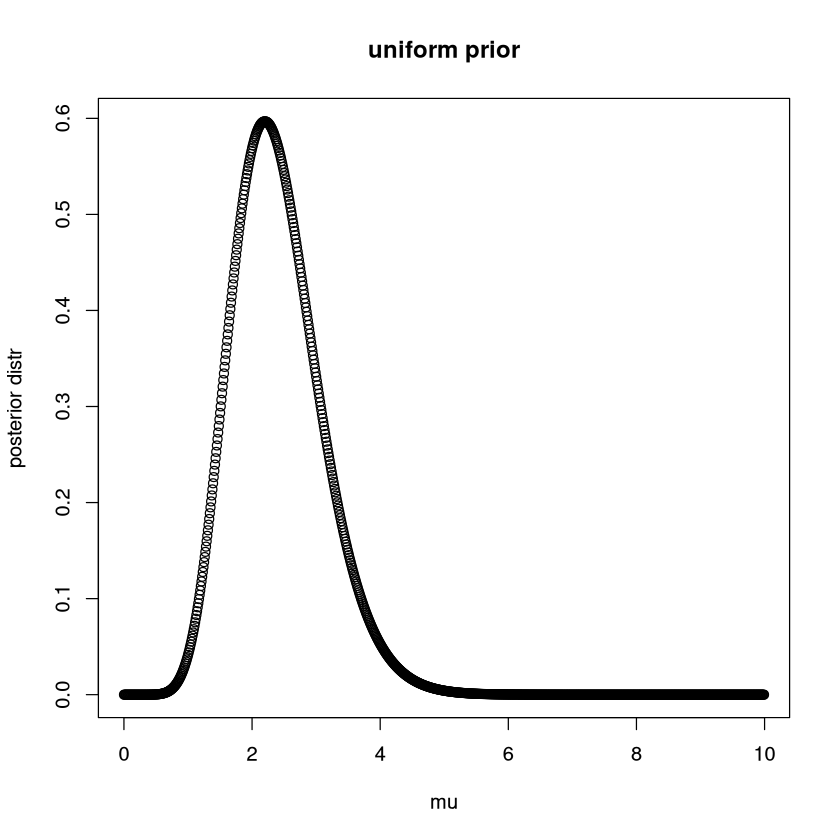

In [87]:
# for a uniform prior, the posterior is a gamma distr with
# alpha = sum(y) + 1 and lambda = n

alpha <- sum(x) + 1
lambda <- length(x)

N <- 1000
p <- seq(from = 1/N,
         by = 10 / N,
         length.out = N)
posterior <- dgamma(x=p, alpha,lambda)

plot(p, posterior, xlab = 'mu', ylab = 'posterior distr', main = 'uniform prior' )


evaluate mean median and variance both analytically and numerically in R

In [77]:
# analytical computations
mean <- alpha / lambda
variance <- alpha / lambda**2
cat('analytical mean:',mean,'and variance:',variance,'\n')
# no way of computing median analytically

# using above computation
mean <- sum(posterior * p) / sum(posterior)
variance <- (sum(posterior * p^2) / sum(posterior)) - mean^2

posterior <- posterior / sum(posterior)

sum <- 0 
median <- 0
for(i in 1:length(posterior)){
    sum <- sum + posterior[i]
    if (sum > 0.5 && median == 0){
        median <- p[i]    
    }
}

cat('numerical mean:',mean,'variance:',variance,' median:',median)

analytical mean: 2.4 and variance: 0.48 
numerical mean: 2.4 variance: 0.48  median: 2.331

b) historical data from other factories show that rate of defective machines is around 2 per day with std dev of 1. Model with a suitable gamma prior and then determine and draw the posterior for mu given data

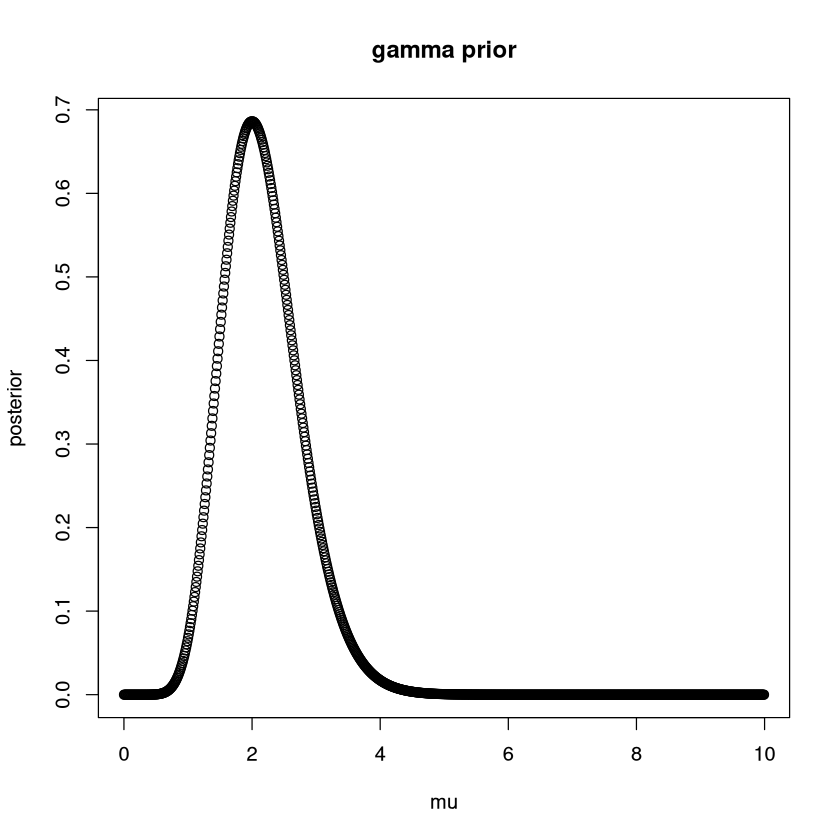

In [88]:
# the posterior distribution is then a gamma function that has
alpha1 <- 2 + sum(x)
lambda1 <- 1 + length(x)

posterior1 <- dgamma(p, alpha1, lambda1)

plot(p, posterior1, xlab = 'mu', ylab = 'posterior', main = 'gamma prior')

evaluate mean median and variance

In [81]:
# analitically
mean1 <- alpha1 / lambda1
variance1 <- alpha1 / lambda1**2
cat('mean:,',mean1,'variance:',variance1,'\n')

# numerically
mean1 <- sum(p * posterior1) / sum(posterior1)
variance1 <- sum(p^2 * posterior1) /sum(posterior1) - mean1**2

median <- 0
sum <- 0 
posterior1 <- posterior1 / sum(posterior1)

for (i in 1:length(posterior1)){
    sum <- sum + posterior1[i]
    if (sum > 0.5 && median == 0){
        median <- p[i]
    }
} 

cat('mean:,',mean1,'variance:',variance1,'median:',median)


mean:, 2.166667 variance: 0.3611111 
mean:, 2.166667 variance: 0.3611111 median: 2.111

c) evaluate a 95% credibility interval for the results obtained with different priors. In addition, compare the results obtained using Gamma posterior distribution with a normal approximation that matches the same mean and std dev

In [80]:
cdf <- cumsum(posterior)
cdf1 <- cumsum(posterior1)

low_idx <- which(cdf >= 0.025)[1]
high_idx <- which(cdf >= 0.975)[1]

low_idx1 <- which(cdf1 >= 0.025)[1]
high_idx1 <- which(cdf1 >= 0.975)[1]

cat('uniform posterior 95% interval:', p[low_idx],'-', p[high_idx],'\n')
cat('gamma posterior 95% interval:', p[low_idx1],'-', p[high_idx1])

uniform posterior 95% interval: 1.241 - 3.941 
gamma posterior 95% interval: 1.151 - 3.491

normal approximations 
uniform posterior 95% interval: 1.041 - 3.761 
gamma posterior 95% interval: 0.991 - 3.341

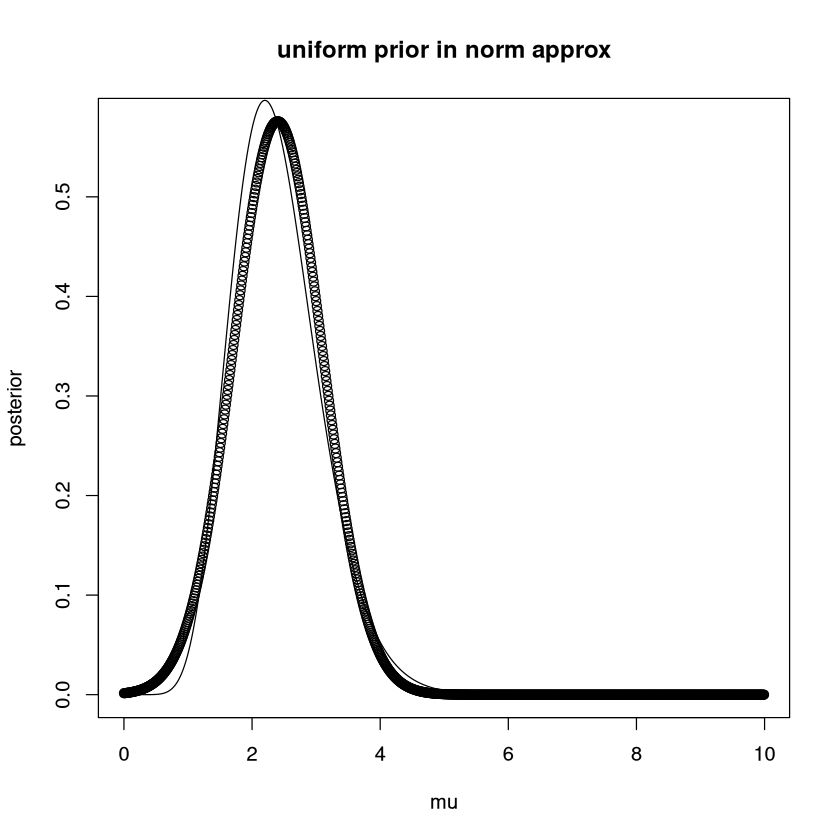

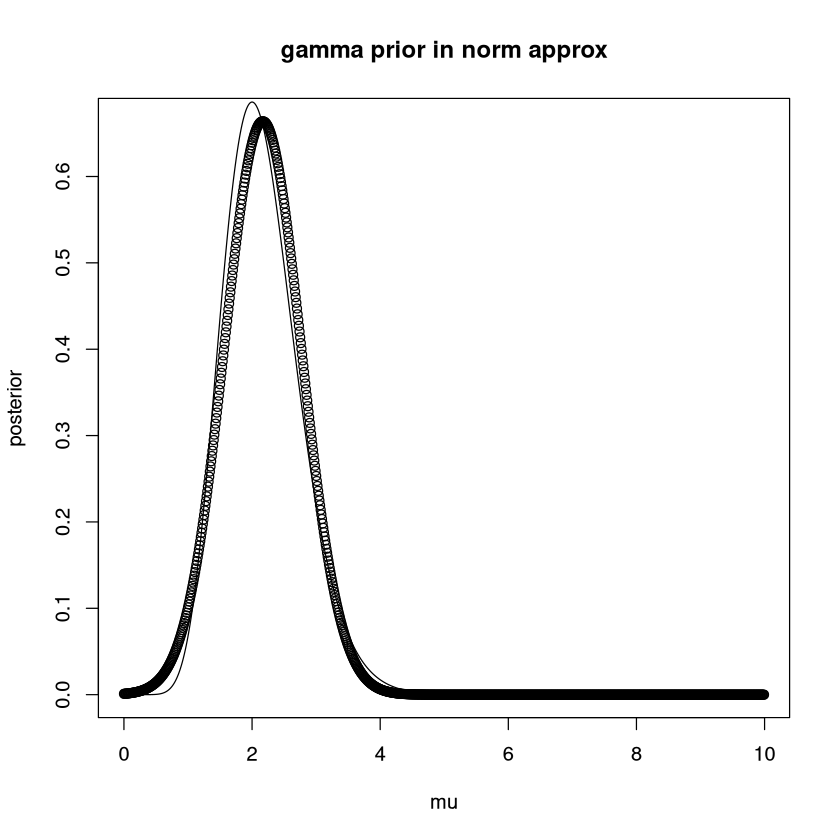

In [102]:
norm <- dnorm(p,mean,variance**(1/2))
norm1 <- dnorm(p, mean1, variance1**(1/2))

norm <- norm / sum(norm)
norm1 <- norm1 / sum(norm1)

cdf <- cumsum(norm)
cdf1 <- cumsum(norm1)

low_idx <- which(cdf >= 0.025)[1]
high_idx <- which(cdf >= 0.975)[1]

low_idx1 <- which(cdf1 >= 0.025)[1]
high_idx1 <- which(cdf1 >= 0.975)[1]

cat('normal approximations \n')
cat('uniform posterior 95% interval:', p[low_idx],'-', p[high_idx],'\n')
cat('gamma posterior 95% interval:', p[low_idx1],'-', p[high_idx1])

norm <- dnorm(p,mean,variance**(1/2))
norm1 <- dnorm(p, mean1, variance1**(1/2))

#first plot (uniform)
plot(p,norm, main = 'uniform prior in norm approx', xlab = 'mu', ylab='posterior')
lines (p,dgamma(p,alpha,lambda)) 

# second plot (gamma)
plot(p,norm1, main = 'gamma prior in norm approx', xlab = 'mu', ylab='posterior')
lines(p, dgamma(p,alpha1,lambda1))

confidence intervals are left-shifted with respect to what found above. this is reasonable since the normal approximations of gamma distributions do the same

# Ex 2: efficiency using Bayesian approach
a) assuming a binomial model where n = 20 trials and r = 12 number of successes, evaluate the mean and the standard deviation using a Bayesian approach under hypotesis of uniform prior (0,1) and Jeffrey's prior Beta(1/2, 1/2)

b) plot the posterior distribution for both

mean estimates - uniform: 0.5909091 jeffrey: 0.5952381 
std estimates - uniform: 0.01051024 jeffrey: 0.01095135 


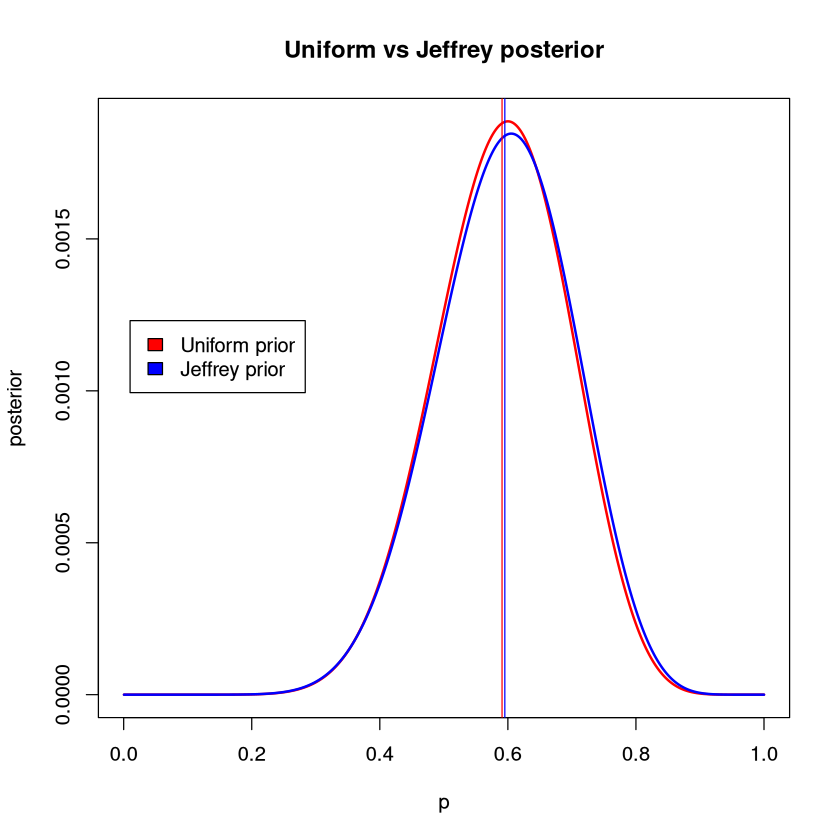

In [127]:
n <- 20
r <- 12

n.samples <- 2000
p <- seq(from = 1/n.samples, by = 1/n.samples, length.out = n.samples)
unif <- dbinom(x=r, size = n, prob = p)

# for jeffrey's prior we have 
alpha <- 1/2 + r
beta <- 1/2 + n - r
# so the posterior is a beta distr with these params
jef <- dbeta(x=p, alpha, beta)

unif <- unif / sum(unif)
jef <- jef / sum(jef)

mean.unif <- sum(p * unif)
mean.jef <- sum(p * jef)
std.unif <- sum(unif * p**2) - mean.unif**2
std.jef <- sum(jef * p**2) - mean.jef**2

cat('mean estimates - uniform:', mean.unif, 'jeffrey:',mean.jef,'\n')
cat('std estimates - uniform:', std.unif , 'jeffrey:',std.jef,'\n')

plot(p,unif, type = 'l', col = 'red', xlab = 'p', ylab = 'posterior', main = 'Uniform vs Jeffrey posterior', lwd = 2)
lines(p, jef, col = 'blue',lwd = 2)
abline(v = mean.unif, col = 'red')
abline(v = mean.jef, col = 'blue')

legend(0.01,max(jef)*2/3, legend = c('Uniform prior','Jeffrey prior'), fill = c('red','blue'))


c) taking into account that the same detector has been studied before and had got n = 10 and r = 10, evaluate mean, stddev and posterior distribution using a uniform prior with these results

mean: 0.9234234 std: 0.0006313625

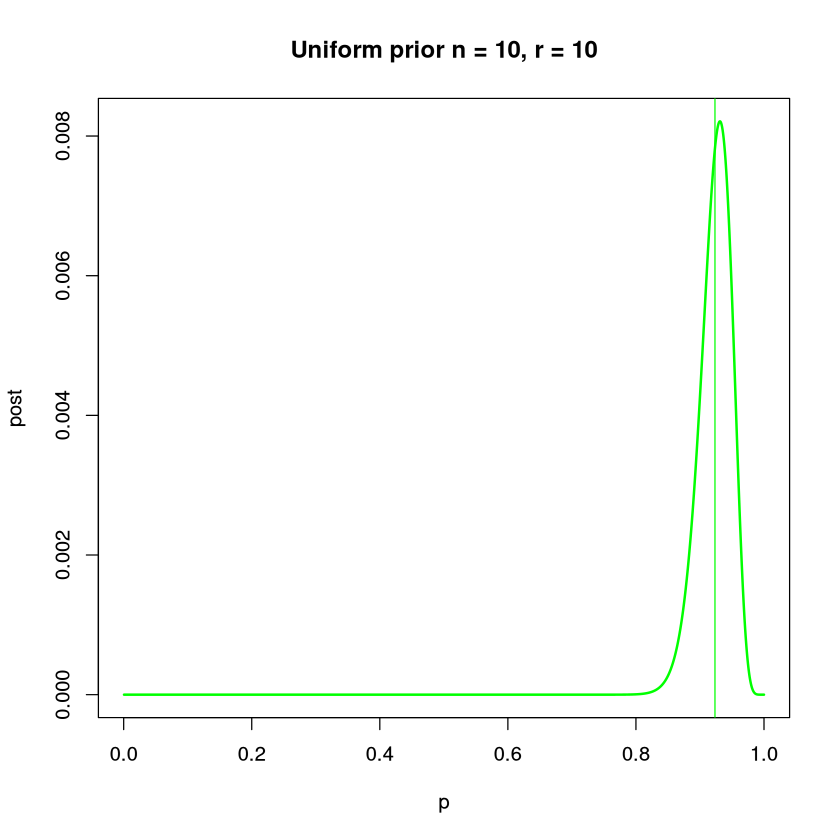

In [137]:
# the prior is a beta prior with alpha = beta = 10
# this way we can compute the posterior given that it has
n <- 10
r <- 10
alpha <- alpha + r
beta <- beta - r + n

post <- dbeta(x = p, alpha, beta)
post <- post / sum(post)
mean <- sum(p * post)
std  <- sum(post*p**2) - mean**2
cat('mean:', mean, 'std:', std)

plot(p, post, col = 'green', type = 'l', main = 'Uniform prior n = 10, r = 10', lwd = 2)
abline(v = mean, col = 'green')

d) Repeat the computation of points a) and b) with data of researcher A using as prior the posterior obtained from c)

mean: 0.8740458 std: 0.0008340132

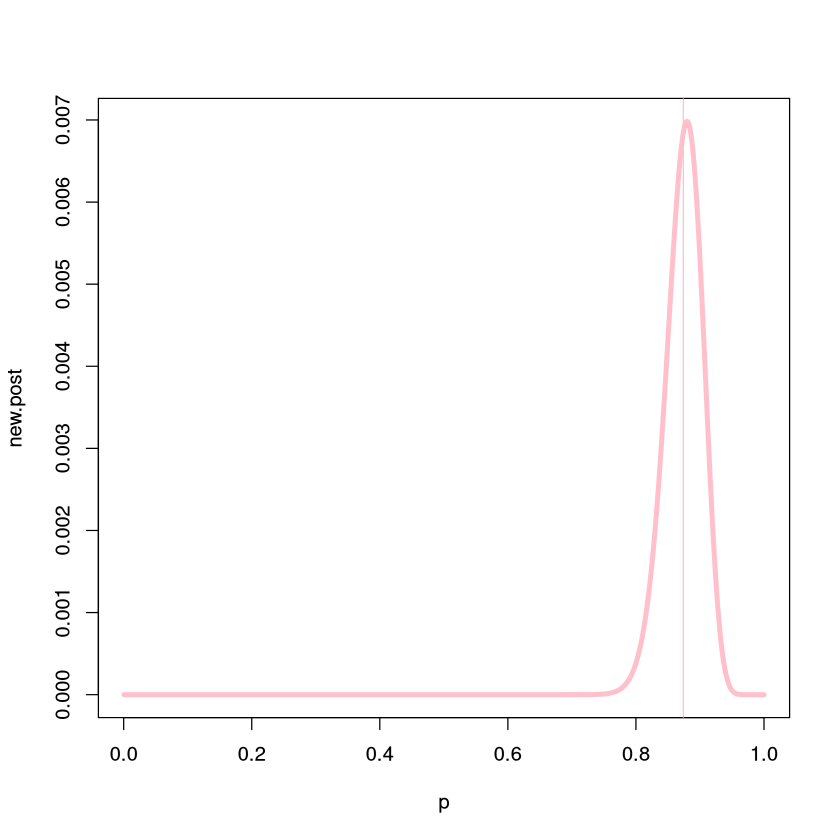

In [147]:
n <- 20
r <- 12
new.alpha <- alpha + r
new.beta <- beta - r + n

new.post <- dbeta(x=p, new.alpha, new.beta)
new.post <- new.post / sum(new.post)
new.mean <- sum(p * new.post)
new.std <- sum(p**2 * new.post) - new.mean**2
cat('mean:',new.mean,'std:',new.std)

plot(p, new.post, type = 'l', lwd = 4, col = 'pink')
abline(v = new.mean, col = 'pink')

e) compute 95% credible interval using d) posterior

In [149]:
cdf <- cumsum(new.post)
start_idx <- which(cdf >= 0.025)[1]
end_idx <- which(cdf >= 0.975)[1]
cat('95% probability interval:', p[start_idx],'-',p[end_idx])

95% probability interval: 0.8125 - 0.925

# Ex 3: Bayesian inference for Binomial model
There are the outcomes of 28 coin flips. a) assuming flat prior and beta prior, plot the likelihood, prior and posterior distribution for the data set

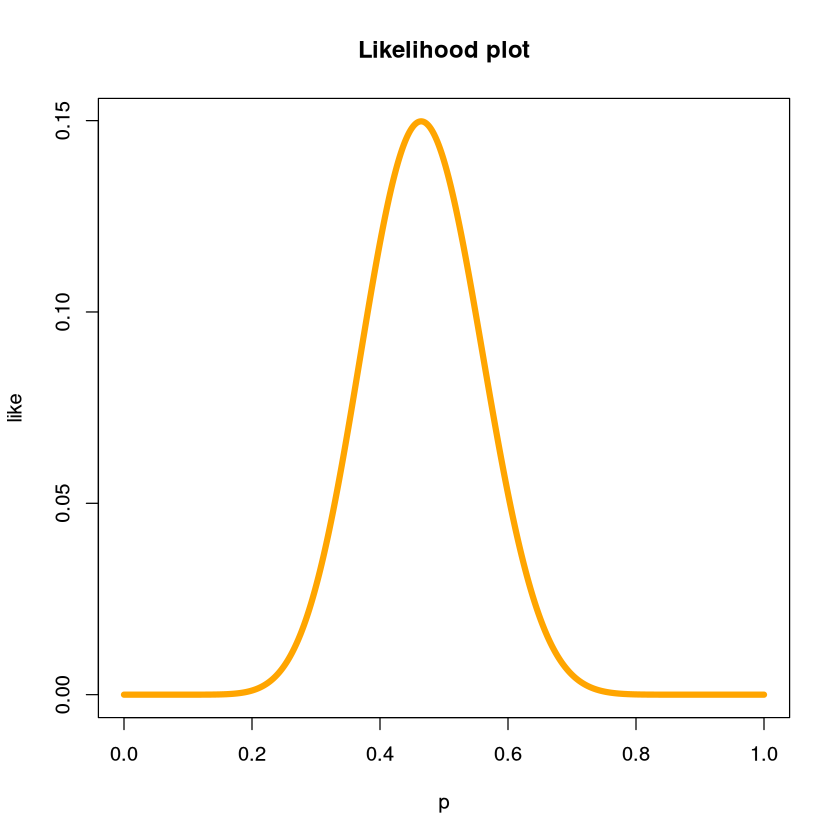

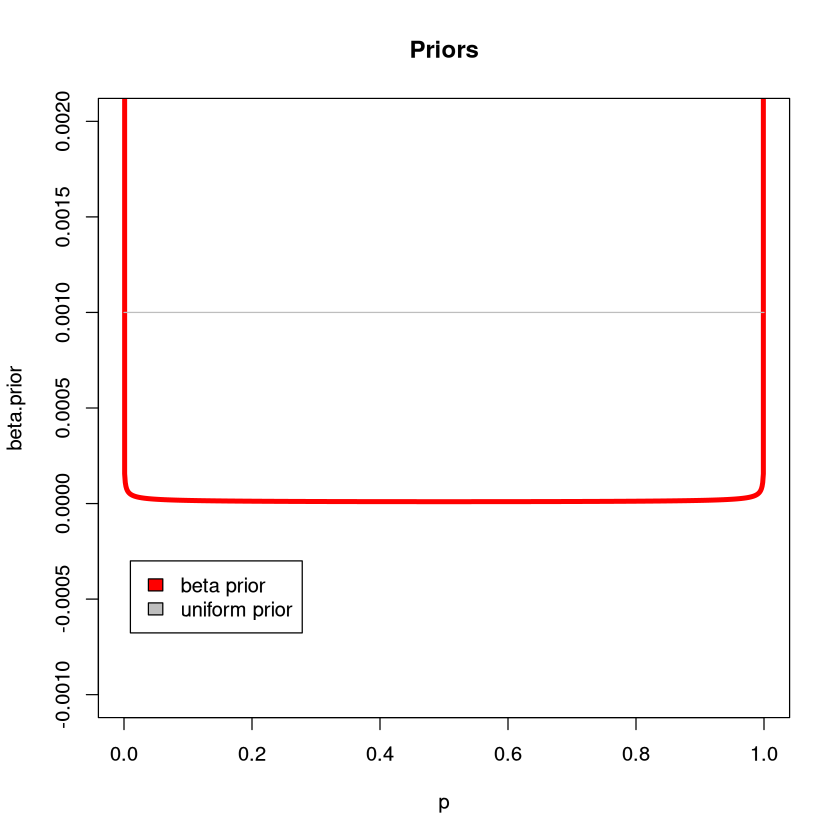

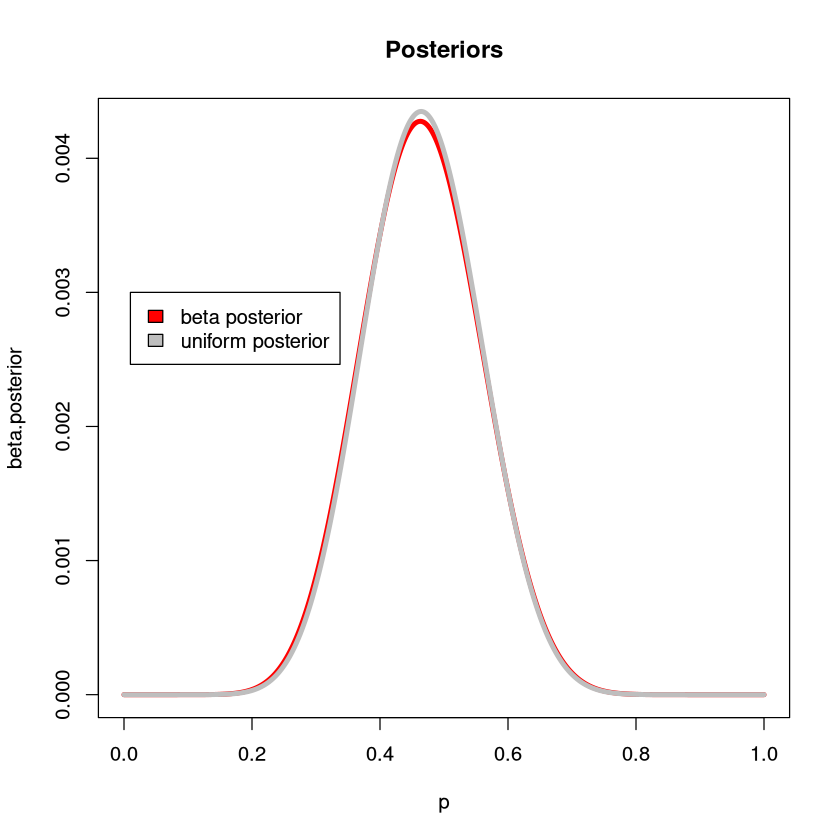

In [242]:
n = 28
t = 15
h = 13

# likelihood plot
epsilon <- 1e-10
p <- seq(epsilon,1-epsilon, length.out = 1000)
like <- dbinom(h, size = n, prob = p)
plot(p, like, type = 'l', col = 'orange', lwd = 5, main = 'Likelihood plot')

# priors plot
len <- 1000
unif.prior <- dunif(p, min = 0, max = 1)
unif.prior <- unif.prior / sum(unif.prior)
# assuming Jeffrey's prior
alpha <- 1/2
beta <- 1/2
beta.prior <- dbeta(p, alpha, beta)
beta.prior <- beta.prior / sum(beta.prior)

plot(p, beta.prior, type = 'l', lwd = 4, main = 'Priors', col ='red', ylim = c(-0.001,0.002))
lines(p, unif.prior, col = 'grey')

legend(0.01,-0.0003,legend = c('beta prior','uniform prior'), fill = c('red','grey'))

# posteriors plot
unif.posterior <- dbinom(x = h, size = n, prob = p)
unif.posterior <- unif.posterior / sum(unif.posterior)
alpha = alpha + h
beta = beta - h + n
beta.posterior <- dbeta(x = p, alpha, beta) 
beta.posterior <- beta.posterior / sum(beta.posterior)

plot(p, beta.posterior, type = 'l', col = 'red', lwd = 4, main = 'Posteriors')
lines(p, unif.posterior, lwd = 4, col = 'grey')
legend(0.01,0.003, legend = c('beta posterior','uniform posterior'), fill = c('red','grey'))

b) evaluate the most probable value for the coin probability p and integrating the posterior pdfs give an estimate for 95% credibility interval

In [250]:
# most probable value for coin probability is the average, so
mean.unif <- sum(p * unif.posterior)
std.unif <- sum(p**2 * unif.posterior) - mean.unif **2 
mean.beta <- sum(p * beta.posterior)
std.beta <- sum(p**2 * beta.posterior) - mean.beta **2
cat('unif prior p estimation:',mean.unif,'with std:',std.unif,'\n')
cat('beta prior p estimation:',mean.beta,'with std:',std.beta,'\n')

cdf.unif <- cumsum(unif.posterior)
cdf.beta <- cumsum(beta.posterior)

start.idx.unif <- which(cdf.unif >= 0.025)[1]
start.idx.beta <- which(cdf.beta >= 0.025)[1]
end.idx.unif <- which(cdf.unif >= 0.975)[1]
end.idx.beta <- which(cdf.beta >= 0.975)[1]

cat('95% confidence interval for uniform prior:',p[start.idx.unif],'-',p[end.idx.unif],'\n')
cat('95% confidence interval for beta prior:',p[start.idx.beta],'-',p[end.idx.beta],'\n')

unif prior p estimation: 0.4666667 with std: 0.008028674 
beta prior p estimation: 0.4655172 with std: 0.008293698 
95% confidence interval for uniform prior: 0.2942943 - 0.6426426 
95% confidence interval for beta prior: 0.2902903 - 0.6446446 


c) repeat the same analysisi assuming a sequential analysis of the data. Show how the most probable value and the credibility interval change as a function of number of coin tosses

final expected value: 0.4666667 with std 0.008028674

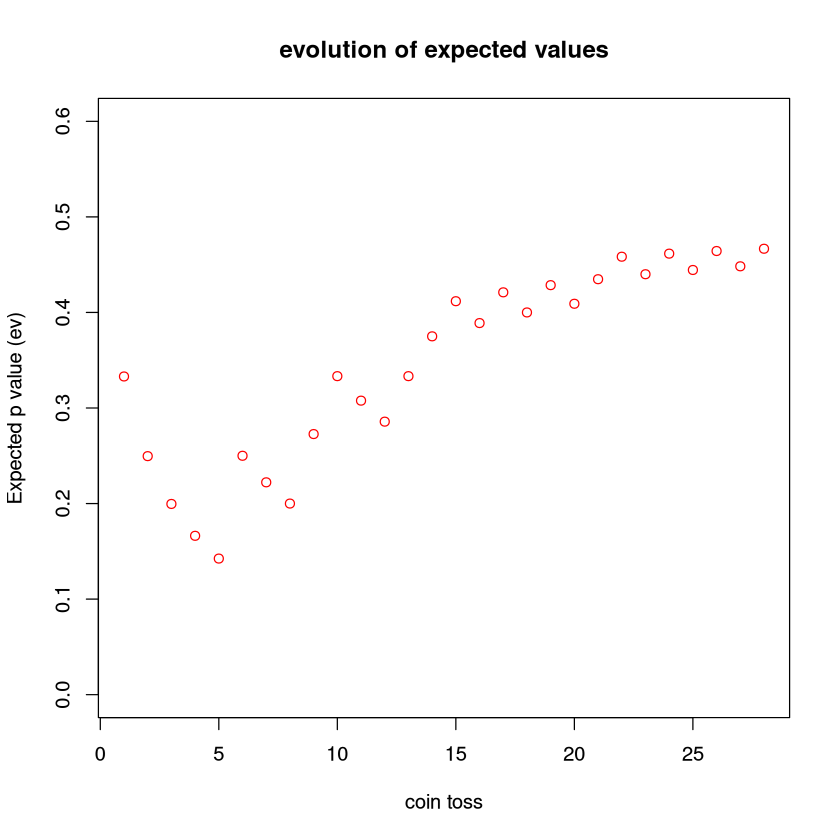

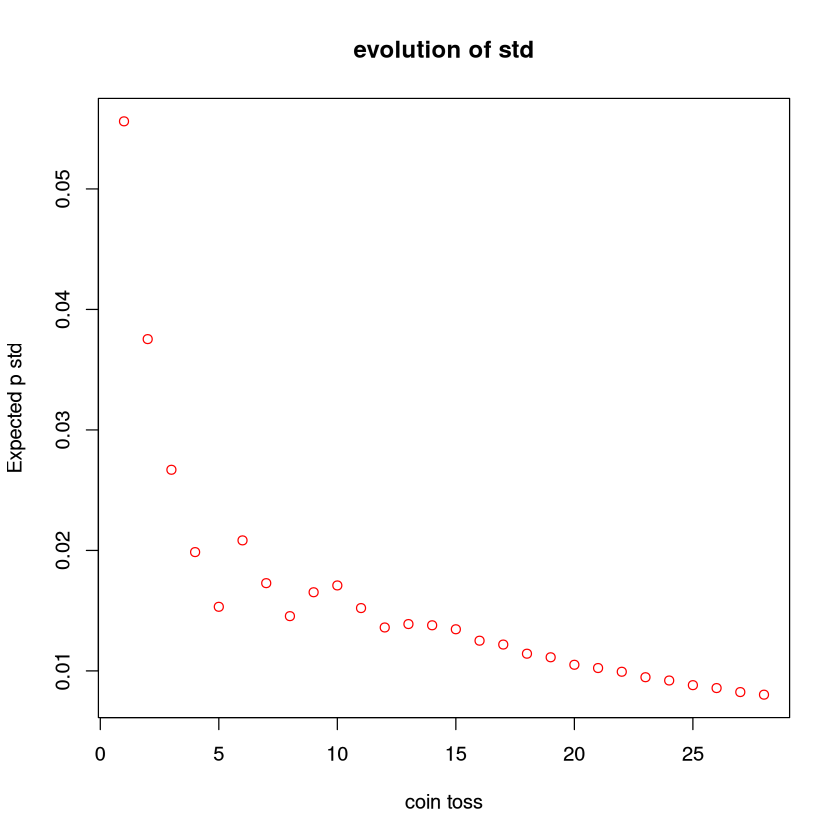

In [252]:
# coin flips
cfs <- c('T','T','T','T','T','H','T','T','H','H','T','T','H','H','H','T','H','T','H','T','H','H','T','H','T','H','T','H')
alpha <- 1
beta <- 1 # starting from a uniform distribution (beta distr)
h <- 0

ev <- c()
ev.std <- c()

for(n in 1:length(cfs)){    
    # checking if head
    if(cfs[n] == 'H'){
        alpha <- alpha + 1
    }
    else # applying beta prior to each step
    {
        beta <- beta + 1
    }
    # computing posterior
    posterior <- dbeta(p, alpha, beta)
    posterior <- posterior / sum(posterior)
    
    # computing average and std
    mean <- sum(p * posterior)
    std <- sum(p**2 * posterior) - mean**2
    ev <- c(ev, mean)
    ev.std <- c(ev.std, std)
}
cat('final expected value:',mean,'with std',std) 

# plotting results
plot(1:length(cfs), ev, col = 'red',ylim = c(0,0.6), 
     ylab = 'Expected p value (ev)', xlab = 'coin toss', main ='evolution of expected values') 

plot(1:length(cfs), ev.std, col = 'red', ylab = 'Expected p std', xlab = 'coin toss', main = 'evolution of std')


d) the result is the same as considering the data as a whole, but with a uniform prior

# Ex 4: Poll
calcluate the expected percentage of votes and a 68% credibility interval for all parties considering:
- uniform prior

In [295]:
tot.voters <- 200
v.a <- 57
v.b <- 31
v.c <- 45
v.d <- 67

# considering a uniform prior, the posteriors follow a binomial distribution
eps <- 1e-6
p <- seq(0,1, length.out = 1000)
posterior.a <- dbeta(p, v.a + 1, tot.voters - v.a + 1)
posterior.a <- posterior.a / sum(posterior.a)
posterior.b <- dbinom(v.b, size = tot.voters, p)
posterior.b <- posterior.b / sum(posterior.b)
posterior.c <- dbinom(v.c, size = tot.voters, p)
posterior.c <- posterior.c / sum(posterior.c)
posterior.d <- dbinom(v.d, size = tot.voters, p)
posterior.d <- posterior.d / sum(posterior.d)

# expected percentage of votes
ev.a <- sum(p * posterior.a) * 100
ev.b <- sum(p * posterior.b) * 100
ev.c <- sum(p * posterior.c) * 100
ev.d <- sum(p * posterior.d) * 100
cat('Expected percentage of voters: \nA:',ev.a,'B:',ev.b,'C:',ev.c,'D:',ev.d,'\n')

# 68% credibility interval
cdf.a <- cumsum(posterior.a)
cdf.b <- cumsum(posterior.b)
cdf.c <- cumsum(posterior.c)
cdf.d <- cumsum(posterior.d)

start.idx.a <- which(cdf.a >= 0.16)[1]
end.idx.a <- which(cdf.a >= 0.84)[1]
start.idx.b <- which(cdf.b >= 0.16)[1]
end.idx.b <- which(cdf.b >= 0.84)[1]
start.idx.c <- which(cdf.c >= 0.16)[1]
end.idx.c <- which(cdf.c >= 0.84)[1]
start.idx.d <- which(cdf.d >= 0.16)[1]
end.idx.d <- which(cdf.d >= 0.84)[1]

cat('68% confidence intervals:\n
    A:',p[start.idx.a],'-',p[end.idx.a],'\n
    B:',p[start.idx.b],'-',p[end.idx.b],'\n
    C:',p[start.idx.c],'-',p[end.idx.c],'\n
    D:',p[start.idx.d],'-',p[end.idx.d])
    

Expected percentage of voters: 
A: 28.71287 B: 15.84158 C: 22.77228 D: 33.66337 
68% confidence intervals:

    A: 0.2552553 - 0.3183183 

    B: 0.1331331 - 0.1841842 

    C: 0.1981982 - 0.2572573 

    D: 0.3033033 - 0.3693694

- a prior constructed from the results obtained from another poll conducted on sample of 100 voters that gave the results of 32,14,26,28

In [298]:
# considering the previous results, a beta prior can be constructed
# it follows that the posteriors are
poll1 <- c(32, 14, 26, 28)
poll2 <- c(57, 31, 45, 67)
parties <- c('A','B','C','D')

ev <- c()

alphas <- poll1 + poll2
betas <- sum(poll1) - poll1 + sum(poll2) - poll2
#cat(alphas, '\n')
#cat(betas)
for (i in 1:length(alphas)){
    posterior <- dbeta(p, alphas[i], betas[i])
    posterior <- posterior / sum(posterior)

    # expected vote percentage
    ev <- c(ev, sum(p * posterior)*100)

    # 68% CL interval
    cdf <- cumsum(posterior)
    start.idx <- which(cdf >= 0.14)[1]
    end.idx <- which(cdf >= 0.86)[1]
    cat('Expected vote percentage for party',parties[i],':',ev[i],'\n')
    cat('68% CL range:',p[start.idx],'-',p[end.idx],'\n')
}


Expected vote percentage for party A : 29.66667 
68% CL range: 0.2682683 - 0.3253253 
Expected vote percentage for party B : 15 
68% CL range: 0.1281281 - 0.1721722 
Expected vote percentage for party C : 23.66667 
68% CL range: 0.2102102 - 0.2632633 
Expected vote percentage for party D : 31.66667 
68% CL range: 0.2872873 - 0.3453453 
